Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

If a variable is given to you, give your answer to that variable. In case of multiple choice questions, answer to the given variable. Make sure your variable has a **string value** and it contains only the letter of your choice. For example if you think that choice b is the correct choice, and the given variable is answer, your answer should look like this:

answer = 'b'

or 

answer = 'B'

If you need to read a file for a task, datafiles, such as .csv or .txt files are found in data subfolder. This can be accessed using data/filename.extension. In case of image, they are found in subfolder images. 

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name below:

In [1]:
NAME = "Noora Angelva"

---

# Multimodal Data Fusion - Exercise 5: Sequential Bayesian Inference


In this exercise, we will take a closer look at the sequential modeling of (multimodal) data using recursive Bayesian filtering framework and especially Kalman filters. You will be learning about Kalman filter applied to single sensor problem as well as fusing multi-sensor data.

## Learning goals 

After this round, you should  

- be able to apply Kalman filter for simple dynamic problem utilizing single sensor data 
- be able to apply Kalman filter for multi-sensor fusion and localization
- be familiar with [filterpy](https://filterpy.readthedocs.io/en/latest/index.html) library

## Relevant lecture

Lecture 6
  
## Relevant chapter in course book

Chapter 12

## Additional Material 

* Kalman Filters [Kalman and Bayesian Filters in Python](https://github.com/rlabbe/Kalman-and-Bayesian-Filters-in-Python)

# Kalman Filter Tutorial

## Introduction

In this exercise, basics of sequential Bayesian inference using recursive Bayesian filtering framework is studied. More specifically, we will be concentrating on linear Gaussian state-space models by implementing and applying basic Kalman filters to one- and multidimensional problems. In each exercise assignment, the linear Gaussian state-space model is formulated as 
<br>
<br>
$
\begin{equation}
\mathbf{x}_k = \mathbf{F}\mathbf{x}_{k-1} + \mathbf{q}_{k-1} \\
\mathbf{y}_k = \mathbf{H}\mathbf{x}_k + \mathbf{r}_k,
\end{equation}
$
<br>
where 
<br>
<br>
$\mathbf{x}_k$ is $n$-dimensional state vector $\mathbf{x_k} = [x^1, x^2, \ldots, x^n]^T$ 
<br>
$\mathbf{y}_k$ is $m$-dimensional measurement vector $\mathbf{y_k} = [y^1, y^2, \ldots, y^m]^T$ 
<br>
$\mathbf{F}$ is $nxn$ transition matrix
<br>
$\mathbf{H}$ is $mxn$ observation matrix
<br>
$\mathbf{q}_{k-1}$ is process noise, normally distributed as $\mathbf{q}_{k-1} \sim \mathcal{N}(0, \mathbf{Q}_{k-1})$
<br>
$\mathbf{r}_{k}$ is observation/measurement noise, normally distributed as $\mathbf{r}_k \sim \mathcal{N}(0, \mathbf{R}_k)$
<br>
<br>
For more detailed background, take a look at Lecture 6. and course book chapter 12.
<br>
<br>
Two different dynamic process models $\mathbf{x}_k = \mathbf{F}\mathbf{x}_{k-1} + \mathbf{q}_{k-1}$ are used in this exercise
<br>
1. Gaussian random walk model, where
<br>
<br>
$
\begin{equation}
\mathbf{F}=\begin{bmatrix}
1 & 0\\
0 & 1
\end{bmatrix}
, 
\mathbf{Q}=\begin{bmatrix}
\sigma^2 & 0\\
0 & \sigma^2
\end{bmatrix}
\end{equation}
$
<br>
<br>
as an example for 2-dimensional state-space. $\sigma^2$ denotes the process noise variance (here same for both dimensions)
<br>
<br>
2. Contant velocity model, where
<br>
<br>
$
\begin{equation}
\mathbf{F}=\begin{bmatrix}
1 & 0 & \Delta t & 0\\
0 & 1 & 0 & \Delta t\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & 1
\end{bmatrix}
, 
\mathbf{Q}=\begin{bmatrix}
q_c \Delta t^3/3 & 0 & q_c \Delta t^2/2 & 0\\
0 & q_c \Delta t^3/3 & 0 & q_c \Delta t^2/2\\
q_c \Delta t^2/2 & 0 & q_c \Delta t & 0\\
0 & q_c \Delta t^2/2 & 0 & q_c \Delta t
\end{bmatrix}
\end{equation}
$
<br>
<br>
as an example for 4-dimensional state-space, including position ($p_x, p_y$) and velocity ($v_x, v_y$) variables, i.e., $\mathbf{x} = [p_x, p_y , v_x, v_y]^T$. $\Delta t$ is the time difference and $q_c$ denotes the spectral density (continuous time variance) of the process noise (here same for both dimensions)

# Kalman Filter for Single Sensor: ECG trend removal

<a id='task1.1'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> Problem 1.1 

Load ECG time-series data from file 'noisy_ecg.csv'. Implement your own 1D Kalman filter (KF) prediction and update/correction steps below to track the trend of signal (i.e., moving average). Run the algorithm with given data and plot data and KF mean estimates to same figure. In addition, plot the signal where the trend / mean is removed from the original signal. Algorithm is presented in Lecture 6. In addition, there is an example in Lecture 2 (page 31).
<br>    
<p> Use following setup, initial values, and parameters with your KF implementation:</p>
<p> * Initialize state mean $\mu$ to first measurement </p>
<p> * Initialize state variance as $\Sigma = 10$ </p>   
<p> * Use random walk dynamical model with Gaussian noise variance $Q = 5$ </p>   
<p> * Use measurement model with Gaussian noise variance $R = 20$ </p> 

<br>
Note that you can formulate the KF with scalar operations or using matrix and vector operations with 1d matrices and vectors (as presented above and in lectures).

<p><i>Hint: Your output images should look like in the cell below</i></p>

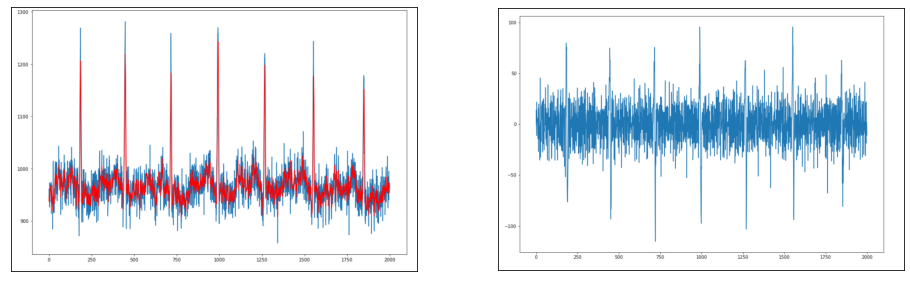

In [2]:
# Example image required for problem 1.1
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,2)
fig.set_size_inches(16, 8)
axs[0].imshow(plt.imread('images/problem1.1_1.2.png'))
axs[1].imshow(plt.imread('images/problem1.1_1.2_2.png'))
for ax in axs:
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
plt.show()

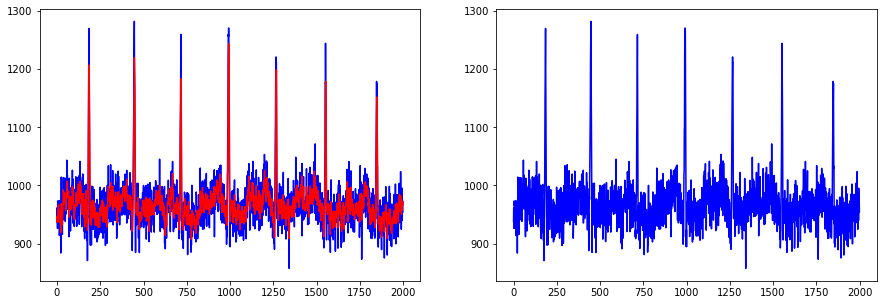

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# load the data to z variable
z = np.genfromtxt('data/noisy_ecg.csv', delimiter=',')
#https://github.com/rlabbe/filterpy/blob/master/filterpy/kalman/kalman_filter.py
def predict(mu, Sigma, F, Q):

    mu = np.dot(F,mu) # mu k | k - 1
    Sigma = np.dot(np.dot(F, Sigma), F.T) + Q
    return mu, Sigma

def update(y, mu, Sigma, H, R):
    # Implement your code here
    # Hint: Consider numerical stability formulation for Sigma (as presented in the lecture)
    I = np.identity(Sigma.shape[0]) # Hint, I is the identity (unit) matrix with the same size as Sigma
    K = np.dot(np.dot(Sigma, H.T), (np.linalg.inv(np.dot(H, np.dot(Sigma, H.T)) + R)))
    mu = mu + np.dot(K, y)
    Sigma = np.dot(np.dot((I - np.dot(K, H)), Sigma), (I - np.dot(K, H)).T) + np.dot(np.dot(K, R), K.T)
    return mu, Sigma

# values initialized here
mu = z[0]
F = np.array([[1]])
H = np.array([[1]])
Sigma = np.array([[10]])
R = np.array([[20]])
Q = np.array([[5]])
output = np.zeros(z.shape[0])

# run your filter in a loop for input data point using your prediction and update(/correction) steps
# store each filtered mean value to output

# Implement Your filtering loop here
# In the loop, assign value to y from the data and give value to output according to updated mu value
for i in range(np.size(z, axis=0)):
    mu, Sigma = predict(mu,Sigma,F,Q)
    y = z[i] - np.dot(H, mu)
    mu, Sigma = update(y, mu, Sigma, H, R)
    output[i] = mu[0][0]

# Plot the data
f = plt.figure(figsize=(15,5))
f.add_subplot(1,2,1)
plt.plot(z, 'b')
plt.plot(output, 'r')
# Plot a 2. graph
f.add_subplot(1,2,2)
plt.plot(z, 'b')
plt.show()

In [4]:
# Your points for Problem 1.1. state mean will be given in this cell. Do not modify it.

In [5]:
# Your points for Problem 1.1. state variance will be given in this cell. Do not modify it.

In [6]:
# Your points for Problem 1.1. output and plot will be given in this cell. Do not modify it.

<a id='task1.2'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> Problem 1.2 
    
Implement the similar KF algorithm using [filterpy](https://filterpy.readthedocs.io/en/latest/index.html) with additional information provided in [Kalman and Bayesian Filters in Python](https://github.com/rlabbe/Kalman-and-Bayesian-Filters-in-Python). Get yourself familiar with filterpy functionalities. Use same data as in previous task and plot the the result and answer the question. Note that filterpy uses $\mathbf{x}$ and $\mathbf{P}$ for model state mean and covariance. 
<br>
<br>
Q1. Are you able to get the same result as in task 1.1?

</div>

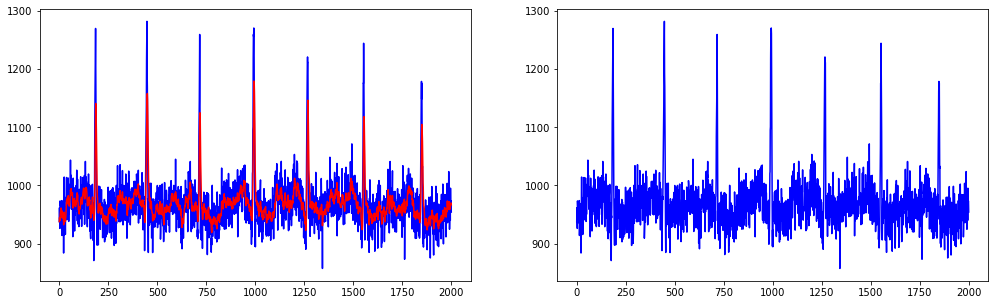

In [7]:
from filterpy.kalman import KalmanFilter

# Assign same values to variables in the KalmanFilter object as in problem 1.1. Hint! Print the object to see its structure
# KalmanFilter object uses different naming convention, make sure to read the assignment!
# Give output in variable output as in problem 1.1
kf = KalmanFilter(dim_x=1, dim_z=1) # Create a KalmanFilter object and use this object to make the calculations
kf.x = z[0]
kf.F = np.array([[1]])
kf.H = np.array([[1]])
kf.P = np.array([[10]])
kf.R = np.array([[20]])

outputs = []
# Loop as many times as in problem 1.1. Remember to predict AND update! Assign value to output[i] as in previous problem
for i in range(len(z)):
    kf.predict()
    kf.update(z[i])
    outputs.extend(kf.x[0])

# Plot the data
f = plt.figure(figsize=(17,5))
f.add_subplot(1,2,1)
plt.plot(z, 'b')
plt.plot(outputs, 'r')
# Plot a 2. graph
f.add_subplot(1,2,2)
plt.plot(z, 'b')
plt.show()

In [8]:
# Your points for Problem 1.2. output and plot will be given in this cell. Do not modify it.

In [9]:
# Your points for Problem 1.2. state mean value will be given in this cell. Do not modify it.

In [10]:
# Your points for Problem 1.2. state variance will be given in this cell. Do not modify it.

In [11]:
# Q1: Did you get the same results?
# "a" = yes
# "b" = no

answer = "a"

In [12]:
# Your points for Problem 1.2. Q1 will be given in this cell. Do not modify it.

# Kalman Filter for Multi-data Fusion: Robot Tracking and Localization

## Robot location data loading and visualization

<a id='task2.1'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> Problem 2.1 

Load robot tracking and localization dataset from file 'robot_gps_wifi_localization.csv' using pandas. Dataset contains simulated GPS and WiFi location data with ground truths (GT) of mobile robot moving in 2D environment. 
Plot ground truth path as well as GPS and WiFi measurements to same figure and answer the questions. <i>Hint: Your output image should look like in the cell below</i>.
<br>
<br>
<p> Q1. What can you say about the measurements and their noise level? </p>
<p> Q2. How well they estimate the true location? </p>

</div>

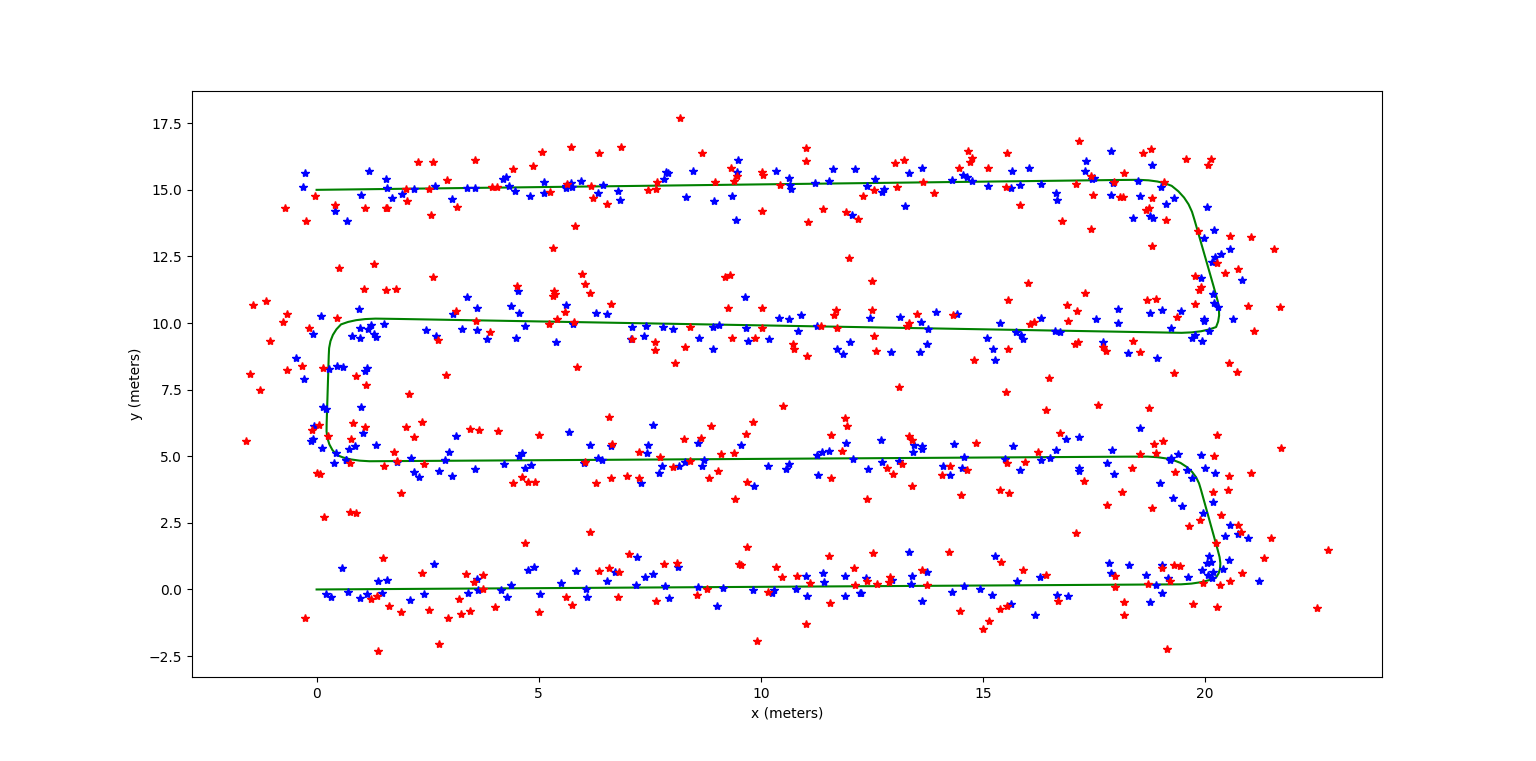

In [13]:
# Example image required for problem 2.1
from IPython.display import Image
Image(filename='images/problem2_1.png')

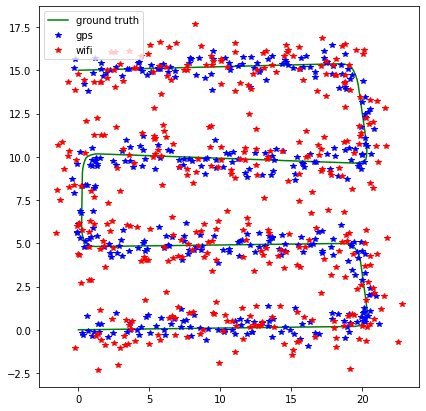

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the data to a numpy array
# YOUR CODE HERE
data = pd.read_csv('data/robot_gps_wifi_localization.csv')
data.columns = [col.strip() for col in list(data.columns)] # remove leading whitespace

# Plot the data
f = plt.figure(figsize=(15,7))
f.add_subplot(1,2,1)
plt.plot(data["gt_x"], data["gt_y"], color='g', label="ground truth")
plt.plot(data["gps_x"], data["gps_y"], '*', color='b', label="gps")
plt.plot(data["wifi_x"], data["wifi_y"], '*', color='r', label="wifi")
plt.legend()
plt.show()

In [15]:
# Your points for Problem 2.1. plot will be given in this cell. Do not modify it.

In [16]:
# Q1. What can you say about the measurements and their noise level? 
# "a"  = GPS more noisy
# "b" = WiFi more noisy
Q1 = "b"

# Q2. How well they estimate the true location? 
# "a" = well
# "b" = poorly
Q2 = "a"

In [17]:
# Your points for Problem 2.1. Q1 will be given in this cell. Do not modify it.

In [18]:
# Your points for Problem 2.1. Q2 will be given in this cell. Do not modify it.

## Independent GPS and WiFi Kalman Filters

<a id='task2.2'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> Problem 2.2 

Implement Kalman filters for GPS and WiFi measurements indepedently using filterpy library. Run algorithms using the dataset above and plot the measurements and KF results against the ground truth (GT) path. Compare the results using root mean square error (RMSE) between filter mean estimates and GT. Answer the questions. <i> Hint: Your output image should look like in the cell below</i>
<br>
<br>
RMSE is calculated as 
<br>
$
\begin{equation}
RMSE = \sqrt{\frac{1}{N}\sum_i^N (\mathbf{x}_i - \tilde{\mathbf{x}}_i)^2},
\end{equation}
$
<br>
where $\mathbf{x}_i$ is the $i$th true location (GT) and $\tilde{\mathbf{x}}_i)$ is $i$th location estimate by KF.
<br> 
<p> Use following setup, initial values, and parameters with your KF implementations:</p>
<p> * Initialize model state mean vector $\mathbf{x}=\begin{bmatrix}p_x \\ p_y \end{bmatrix}$ with position estimates ($p_x$, $p_y$) to the first ground truth location </p>
<p> * Initialize model state covariance $\mathbf{P} = \begin{bmatrix} \sigma_{p_x}^2 & 0 \\ 0 & \sigma_{p_y}^2 \end{bmatrix}$ where $\sigma_{p_x}^2=2.0$ and $\sigma_{p_y}^2=2.0$ are position noise variances</p>   
<p> * Use random walk dynamical model with Gaussian noise $\mathbf{Q} = \begin{bmatrix} \sigma^2 & 0 \\ 0 & \sigma^2 \end{bmatrix}$ where $\sigma^2=1.0$ is process noise variance</p> 
<p> * Use measurement model with Gaussian noise $\mathbf{R} = \begin{bmatrix} \sigma^2 & 0 \\ 0 & \sigma^2 \end{bmatrix}$ where measurement noise variances are $\sigma^2=5.0$ for GPS and $\sigma^2=10.0$ for WiFi model </p>     
<p> * Set $\mathbf{F}$ and $\mathbf{H}$ based on dimensions of state and observation/measurement vectors
<br> 
<br>
<p> Q1. How GPS and Wifi based methods compared to each other based on RMSE? </p>
</div>

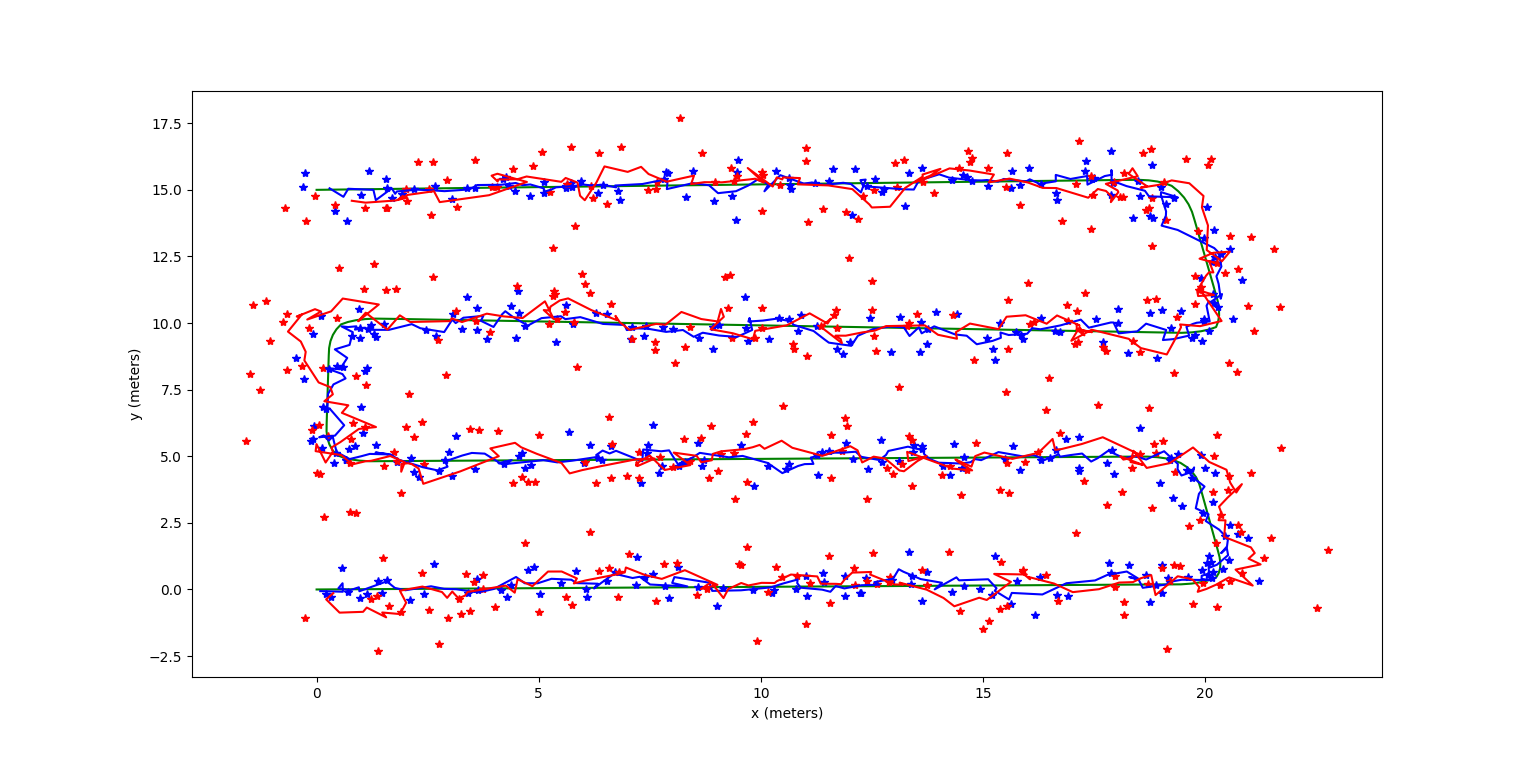

In [19]:
# Example image required for problem 2.2
from IPython.display import Image
Image(filename='images/problem2_2.png')

RMSE gps:  0.3641121312946564
RMSE wifi:  10.872251398832532


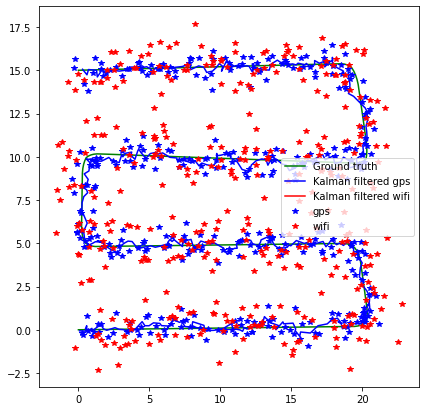

In [20]:
# Kalman filter for gps
kf1 = KalmanFilter(dim_x=2, dim_z=2) 
kf1.x = np.array([data["gt_x"].loc[0], data["gt_y"].loc[0]])
kf1.F = np.array([[1,0],
                  [0,1]])

kf1.H = np.array([[1,0],
                  [0,1]])
kf1.P *= 2 
kf1.R = np.array([[5,0],
                  [0,5]])

kf1.Q = np.array([[1,0],
                  [0,1]])

output1 = np.zeros((data.shape[0], 2)) # Save KF results for gps in here
for i in range(len(data["gt_x"].values)):
    kf1.predict()
    kf1.update([data["gps_x"].loc[i], data["gps_y"].loc[i]])
    output1[i, 0] = kf1.x[0]
    output1[i, 1] = kf1.x[1]

# Kalman filter for wifi 
kf2 = KalmanFilter(dim_x=2, dim_z=2) 
kf2.x = np.array([data["gt_x"].loc[0], data["gt_y"].loc[0]])
kf2.F = np.array([[1,0],
                  [0,1]])

kf2.H = np.array([[1,0],
                  [0,1]])
kf2.P *= 2 
kf2.R = np.array([[5,0],
                  [0,5]])

kf2.Q = np.array([[1,0],
                  [0,1]])

output2 = np.zeros((data.shape[0], 2)) # Save KF results for gps in here
for i in range(len(data["gt_x"].values)):
    kf2.predict()
    kf2.update([data["wifi_x"].loc[i], data["wifi_y"].loc[i]])
    output2[i, 0] = kf1.x[0]
    output2[i, 1] = kf1.x[1]
    
#Use the ground truth and outputs to calculate RMSE for gps and wifi to the variables below.  
gps_rmse = np.sqrt(np.square(np.subtract(data.loc[:, ["gt_x", "gt_y"]].values,output1)).mean() ) # Calculate RMSE. Hint! Check the formula above. 
wifi_rmse = np.sqrt(np.square(np.subtract(data.loc[:, ["gt_x", "gt_y"]].values,output2)).mean() ) # Calculate the RMSE. Hint! Check the formula above.
print('RMSE gps: ',gps_rmse)
print('RMSE wifi: ',wifi_rmse)

# Plot the data
f = plt.figure(figsize=(15,7))
f.add_subplot(1,2,1)
plt.plot(data["gt_x"], data["gt_y"], color='g', label="Ground truth")
plt.plot(output1[:,0], output1[:,1], color='b', label="Kalman filtered gps")
plt.plot(output2[:,0], output2[:,1], color='r', label="Kalman filtered wifi")
plt.plot(data["gps_x"], data["gps_y"], '*', color='b', label="gps")
plt.plot(data["wifi_x"], data["wifi_y"], '*', color='r', label="wifi")
plt.legend()
plt.show()

In [21]:
# Your points for Problem 2.2. GPS RMSE will be given in this cell. Do not modify it.

In [22]:
# Your points for Problem 2.2. WiFi RMSE will be given in this cell. Do not modify it.

In [23]:
# Your points for Problem 2.2. outputs and plot will be given in this cell. Do not modify it.

In [24]:
# Q1. How GPS and Wifi based methods compared to each other based on RMSE? 
# "a" = GPS is better 
# "b" = Wifi is better
# "c" = Performance is same

answer = "a"

In [25]:
# Your points for Problem 2.2. Q1 will be given in this cell. Do not modify it.

## Measurement Fusion with Kalman Filter

<a id='task2.3'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> Problem 2.3 

Extend the KF model from previous problem 2.2 with fused GPS and WiFi measurements using filterpy library and same random walk dynamic model. Use single model with two-dimensional measurements. Run algorithm using the dataset above and plot the KF results against the ground truth (GT) path. Compare the results using root mean square error (RMSE) between filter mean estimates and GT. Answer the questions. <i>Hint: Your output image should look like in the cell below</i>.

<p> Use following setup, initial values, and parameters with your KF implementations:</p>
<p> * Initialize model state mean vector $\mathbf{x}=\begin{bmatrix}p_x \\ p_y \end{bmatrix}$ with position estimates ($p_x$, $p_y$) to the first ground truth location</p>
<p> * Initialize model state covariance $\mathbf{P} = \begin{bmatrix} \sigma_{p_x}^2 & 0 \\ 0 & \sigma_{p_y}^2 \end{bmatrix}$ where $\sigma_{p_x}^2=2.0$ and $\sigma_{p_y}^2=2.0$ are position noise variances</p>   
<p> * Use random walk dynamical model with Gaussian noise $\mathbf{Q} = \begin{bmatrix} \sigma^2 & 0 \\ 0 & \sigma^2 \end{bmatrix}$ where $\sigma^2=1.0$ is process noise variance</p> 
<p> * Use measurement model with Gaussian noise $\mathbf{R} = \begin{bmatrix}\sigma_{GPS}^2 & 0 & 0 & 0 \\ 0 & \sigma_{GPS}^2 & 0 & 0 \\ 0 & 0 & \sigma_{WiFI}^2 & 0 \\ 0 & 0 & 0 & \sigma_{WiFi}^2 \end{bmatrix}$ where $\sigma_{GPS}^2=5.0$ and $\sigma_{WiFi}^2=10.0$ </p>     
<p> * Set $\mathbf{F}$ and $\mathbf{H}$ based on dimensions of state and observation/measurement vectors
<br> 
<br> 
<p> Q1. How well KF with measurement fusion can estimate the location compared to independent filters? </p>

</div>

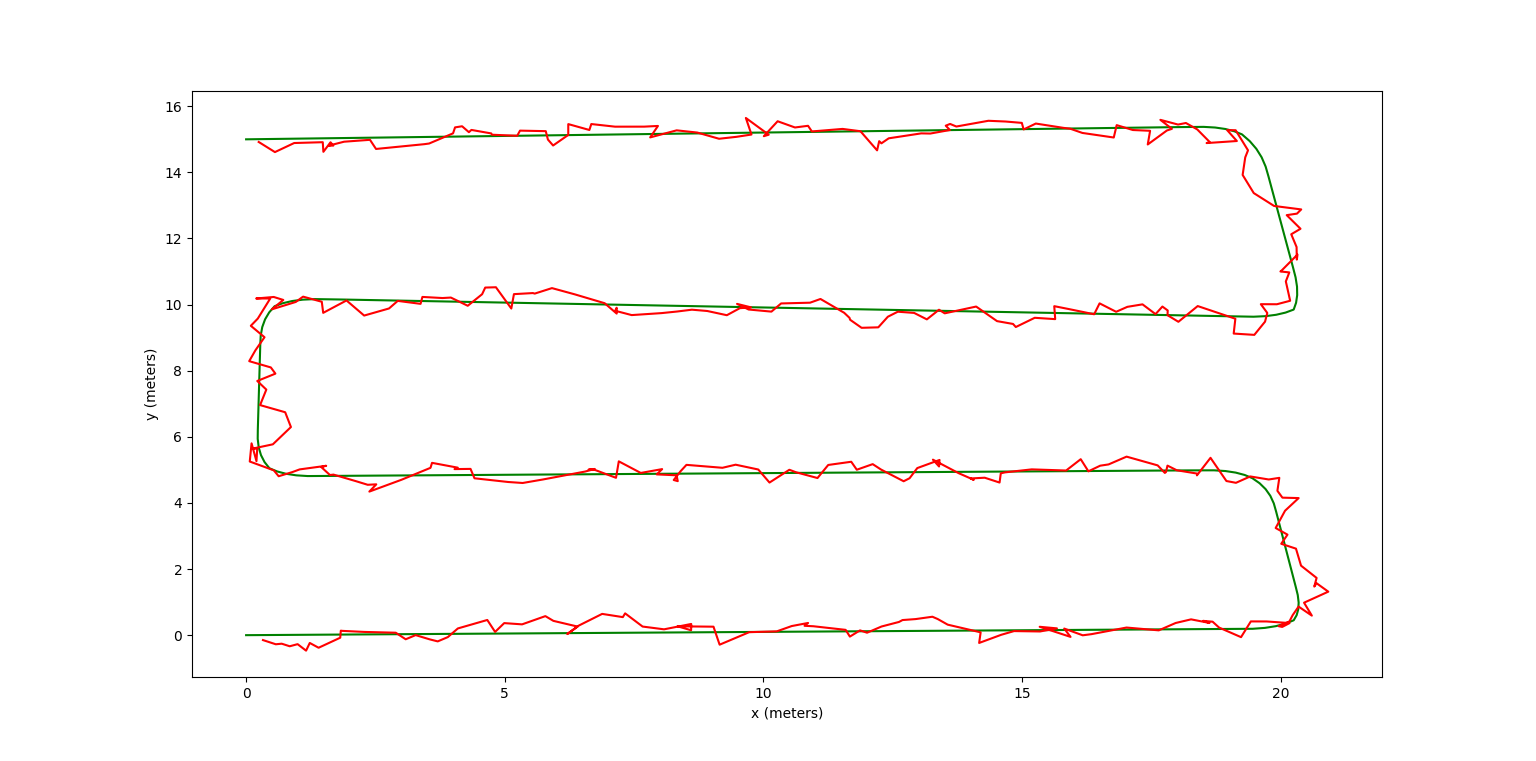

In [26]:
# Example image required for problem 2.3
from IPython.display import Image
Image(filename='images/problem2_3.png')

RMSE:  0.3196722136518404


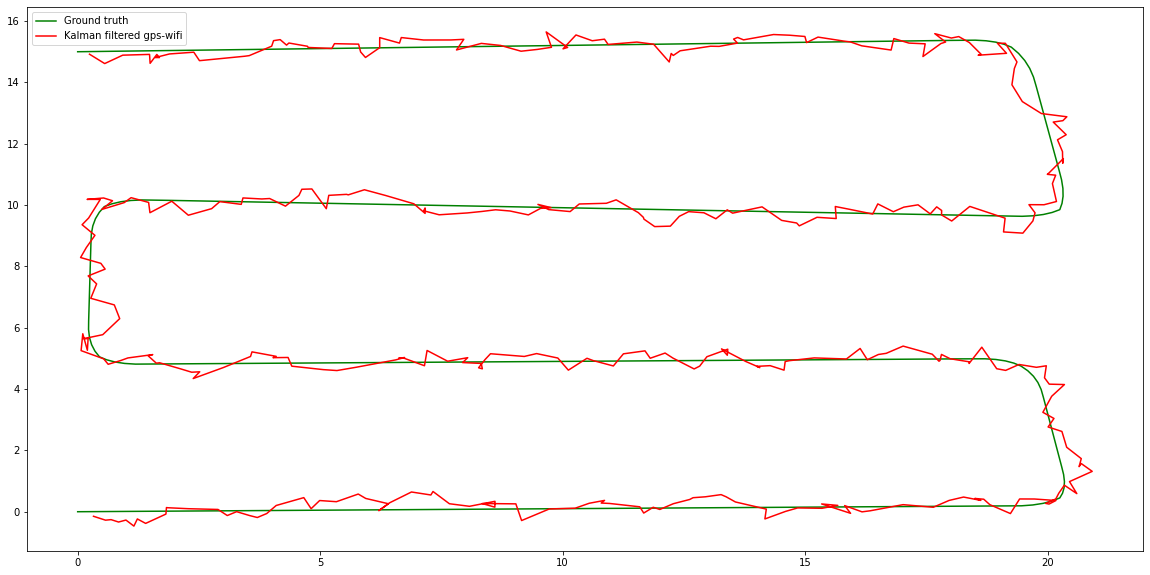

In [27]:
# Kalman filter
kf = KalmanFilter (dim_x=2, dim_z=4)
kf.x = np.array([data["gt_x"].loc[0], data["gt_y"].loc[0]])
kf.P *=2.0
kf.Q *= 1
kf.R = np.array([[5,0,0,0],
                 [0,5,0,0],
                 [0,0,10,0],
                 [0,0,0,10]])

kf.H = np.array([[1, 0],
                [0, 1],
                [1, 0],
                [0, 1]])


output = np.zeros((data.shape[0], 2))
for i in range(len(data["gt_x"].values)):
    kf.predict()
    kf.update([data["gps_x"].loc[i], data["gps_y"].loc[i], data["wifi_x"].loc[i], data["wifi_y"].loc[i]])
    output[i, 0] = kf.x[0]
    output[i, 1] = kf.x[1]

    
# Use the ground truth and output to calculate RMSE.  
rmse = np.sqrt(np.square(np.subtract(data.loc[:, ["gt_x", "gt_y"]].values,output)).mean() ) # Calculate RMSE. Hint! Check the formula above. 
print('RMSE: ',rmse)

# Plot
plt.figure(figsize=(20,10))
plt.plot(data["gt_x"], data["gt_y"], color='g', label="Ground truth")
plt.plot(output[:,0], output[:,1], color='r', label="Kalman filtered gps-wifi")
plt.legend()
plt.show()

In [28]:
# Your points for Problem 2.3. output and plot will be given in this cell. Do not modify it.

In [29]:
# Your points for Problem 2.3. RMSE will be given in this cell. Do not modify it.

In [30]:
# Q1: How well KF with measurement fusion can estimate the location compared to independent filters?
# "a"  = Better
# "b" = Worse
answer = "a"

In [31]:
# Your points for Problem 2.3. Q1 will be given in this cell. Do not modify it.

## Measurement Fusion with Constant Velocity Kalman Filter

<a id='task2.4'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> Problem 2.4 

Extend the KF model from previous problem 2.3 with use of constant velocity model instead of random walk model. Now the state vector $x$ becomes 4-dimensional including 2D position and velocity variables. Run algorithm using the dataset above and plot the KF results against the ground truth (GT) path. Compare the results using root mean square error (RMSE) between filter mean estimates and GT. Answer the questions. <i>Hint: Your output image should look like in the cell below.</i>

<br>
<p> Use following setup, initial values, and parameters with your KF implementations:</p>
<p> * Initialize model state mean vector $\mathbf{x}= \begin{bmatrix}p_x \\ p_y \\ v_x \\ v_y \end{bmatrix}$ with position estimates ($p_x$, $p_y$) to the first ground truth location and velocity estimates ($v_x$, $v_y$) to zero </p>
<p> * Initialize model state covariance $\mathbf{P} = \begin{bmatrix} \sigma_{p_x}^2  & 0 & 0 & 0 \\ 0 & \sigma_{p_y}^2  & 0 & 0 \\ 0 & 0 & \sigma_{v_x}^2  & 0 \\ 0 & 0 & 0 & \sigma_{v_y}^2  \end{bmatrix}$ where $\sigma_{p_x}^2=2.0$ and $\sigma_{p_y}^2=2.0$ are position and $\sigma_{v_x}^2=2.0$ and $\sigma_{v_y}^2=2.0$ velocity noise variances, respectively</p>   
<p> * Use constant velocity dynamical model with
<br>
$
\begin{equation}
\mathbf{F}=\begin{bmatrix}
1 & 0 & \Delta t & 0\\
0 & 1 & 0 & \Delta t\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & 1
\end{bmatrix}
, 
\mathbf{Q}=\begin{bmatrix}
q_c \Delta t^3/3 & 0 & q_c \Delta t^2/2 & 0\\
0 & q_c \Delta t^3/3 & 0 & q_c \Delta t^2/2\\
q_c \Delta t^2/2 & 0 & q_c \Delta t & 0\\
0 & q_c \Delta t^2/2 & 0 & q_c \Delta t
\end{bmatrix}
\end{equation}
$
<br>  
where time difference between samples is $\Delta t=0.25$ and spectral density of process noise is $q_c = 1.0$</p> 
<p> * Use measurement model with Gaussian noise $\mathbf{R} = \begin{bmatrix} \sigma_{GPS}^2 & 0 & 0 & 0 \\ 0 & \sigma_{GPS}^2 & 0 & 0 \\ 0 & 0 & \sigma_{WiFI}^2 & 0 \\ 0 & 0 & 0 &\sigma_{WiFi}^2 \end{bmatrix}$ where $\sigma_{GPS}^2=5.0$ and $\sigma_{WiFi}^2=10.0$</p>     
<p> * Set $\mathbf{H}$ based on dimensions of state and observation/measurement vectors
<br>
<br> 
<p> Q1. How well the KF with constant velocity model performs compared to previous models? </p>

</div>

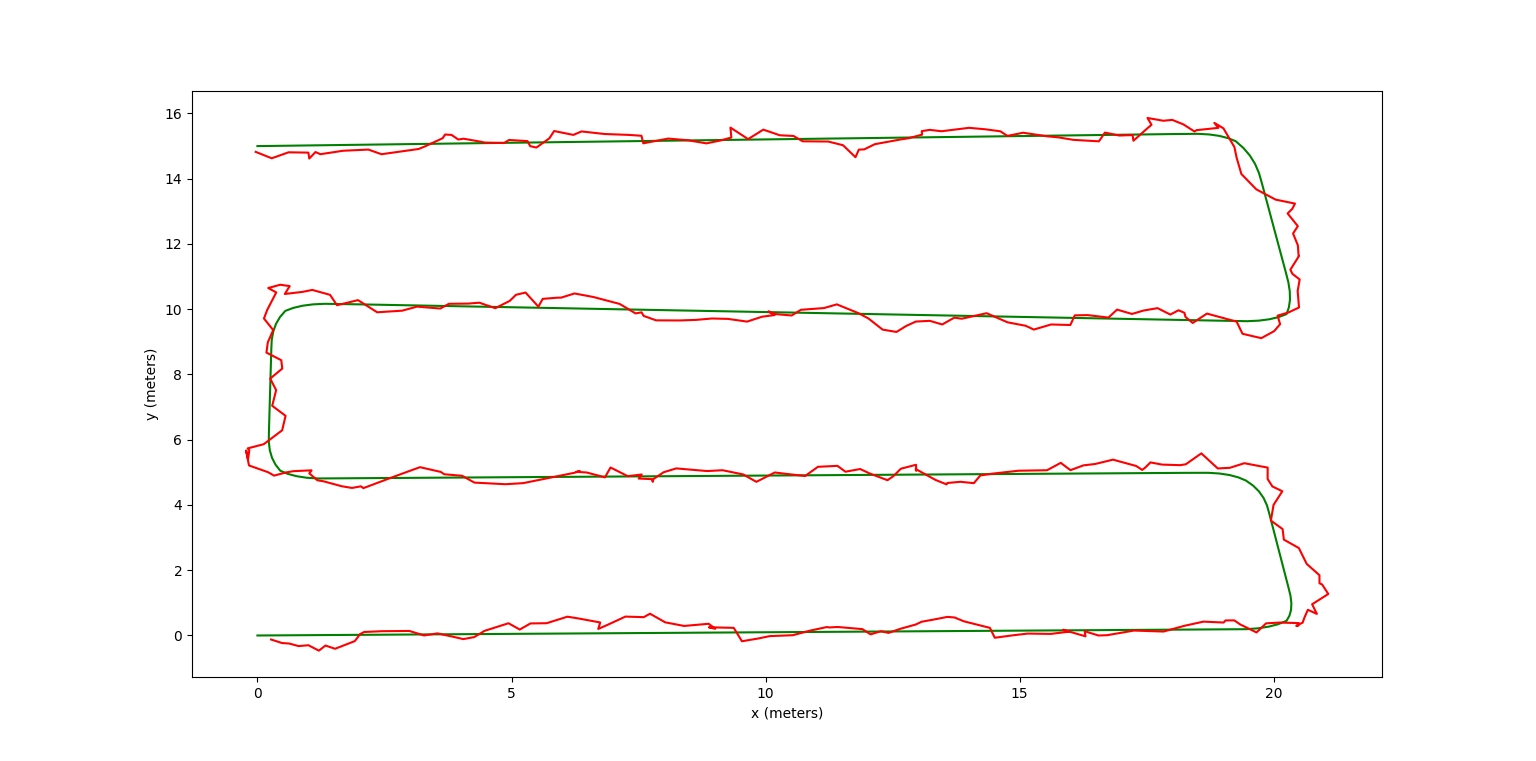

In [32]:
# Example image required for problem 2.4
from IPython.display import Image
Image(filename='images/problem2_4.png')

RMSE:  0.2607716399652213


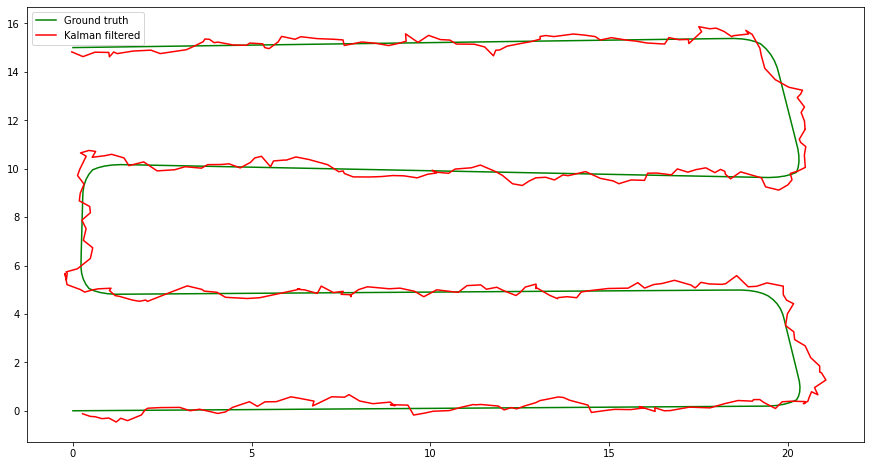

In [38]:
#Implement your code here.
delta_t = 0.25
qc = 1.0
q1 = qc*delta_t
q2 = qc*(delta_t**2)/2
q3 = qc*(delta_t**3)/3

kf = KalmanFilter(dim_x=4, dim_z=4)
kf.x = np.array([data["gt_x"].loc[0], data["gt_y"].loc[0], 0, 0])
kf.P *= 2 

kf.F = np.array([[1,0,delta_t,0],
                  [0,1,0,delta_t],
                  [0,0,1,0],
                  [0,0,0,1]])

kf.Q = np.array([[q3, 0., q2, 0.],
               [0., q3, 0., q2],
               [q2, 0., q1, 0.],
               [0., q2, 0., q1]])

kf.R = np.array([[5, 0, 0, 0],
                 [0, 5, 0, 0],
                 [0, 0, 10, 0],
                 [0, 0, 0, 10]])

kf.H = np.array([[1., 0., 0., 0.],
                [0., 1., 0., 0.],
                [1., 0., 0., 0.],
                [0., 1., 0., 0.]])

output = np.zeros((data.shape[0], 2))
for i in range(0,len(data["gt_x"].values)):
    kf.predict()
    kf.update([data["gps_x"].loc[i], data["gps_y"].loc[i],data["wifi_x"].loc[i], data["wifi_y"].loc[i]])
    output[i, 0] = kf.x[0]
    output[i, 1] = kf.x[1]

# Use the ground truth and output to calculate RMSE.  
rmse = np.sqrt(np.square(np.subtract(data.loc[:, ["gt_x", "gt_y"]].values,output)).mean()) # Calculate RMSE. Hint! Check the formula above. 
print('RMSE: ',rmse)

# Plot results
plt.figure(figsize=(15,8))
plt.plot(data["gt_x"], data["gt_y"], color='g', label="Ground truth")
plt.plot(output[:,0], output[:,1], color='r', label="Kalman filtered")
plt.legend()
plt.show()

In [34]:
# Your points for Problem 2.4. output and plot will be given in this cell. Do not modify it.

In [35]:
# Your points for Problem 2.4. RMSE will be given in this cell. Do not modify it.

In [36]:
# Q1: How well does the KalmanFilter with constant velocity model perform compared to previous models?
# Better = "a" 
# Worse = "b"
# The same = "c"

answer = "a"

In [37]:
# Your points for Problem 2.4. Q1 will be given in this cell. Do not modify it.